## Import IRAS tax collection dataset

In [1]:
import pandas as pd

IRAS_collection = pd.read_csv('iras-collection-by-tax-type-annual/iras-collection-by-tax-type.csv')
IRAS_collection.head(10)

,financial_year,tax_type,tax_collected
0,2002,Income Tax,10876295
1,2002,Goods and Services Tax,2166493
2,2002,Property Tax,1232593
3,2002,Stamp Duty,695437
4,2002,Betting Taxes,1549545
5,2002,Estate Duty,75607
6,2003,Income Tax - Corporate Income Tax,5923741
7,2003,Income Tax - Individual Income Tax and Withhol...,3865164
8,2003,Goods and Services Tax,2958598
9,2003,Property Tax,1331566


## Subset GST tax type

In [2]:
GST_collection = IRAS_collection[IRAS_collection['tax_type'] == 'Goods and Services Tax']

Since tax collected in is thousands,

In [3]:
GST_collection['tax_collected'] = GST_collection['tax_collected']*1000
GST_collection.head(5)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,financial_year,tax_type,tax_collected
1,2002,Goods and Services Tax,2166493000
8,2003,Goods and Services Tax,2958598000
15,2004,Goods and Services Tax,3471884000
23,2005,Goods and Services Tax,3816618000
31,2006,Goods and Services Tax,3978553000


In [4]:
import numpy as np

X_train = np.array(GST_collection['financial_year']).reshape(-1, 1)
y_train = np.array(GST_collection['tax_collected']).reshape(-1, 1)

## Run Linear Regression

In [5]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [6]:
X_pred = np.array([2020, 2021, 2022, 2023]).reshape(-1, 1)
y_pred = regressor.predict(X_pred)

X_pred_df = pd.DataFrame(X_pred, columns = ['financial_year'])
y_pred_df = pd.DataFrame(y_pred, columns = ['tax_collected'])

GST_prediction = pd.concat([X_pred_df, y_pred_df], axis = 1)
GST_prediction

,financial_year,tax_collected
0,2020,1.307033e+10
1,2021,1.364895e+10
2,2022,1.422758e+10
3,2023,1.480620e+10


In [7]:
GST_df = GST_collection[['financial_year', 'tax_collected']]
GST_df = GST_df.append(GST_prediction)
GST_df = GST_df.reset_index(drop=True)
GST_df.tail(5)

,financial_year,tax_collected
17,2019,1.116544e+10
18,2020,1.307033e+10
19,2021,1.364895e+10
20,2022,1.422758e+10
21,2023,1.480620e+10


#### Therefore, tax collected from GST is projected to be $1,480,620 in 2023.

## Data Visualisation

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("darkgrid")

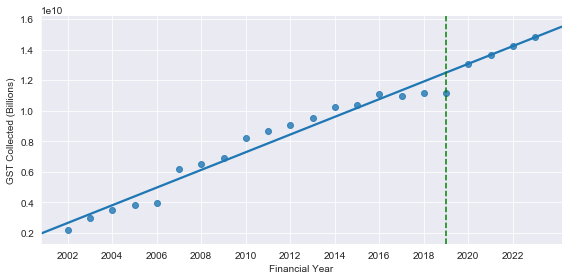

In [9]:
p = sns.lmplot(x="financial_year", y="tax_collected", data=GST_df, 
               ci = None, height = 4, aspect = 2)
plt.axvline(x=2019, color = 'g', ls = '--')

p.set_axis_labels("Financial Year", "GST Collected (Billions)")
p.set(xticks=np.arange(2002,2023+1,2))